<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install scipy

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


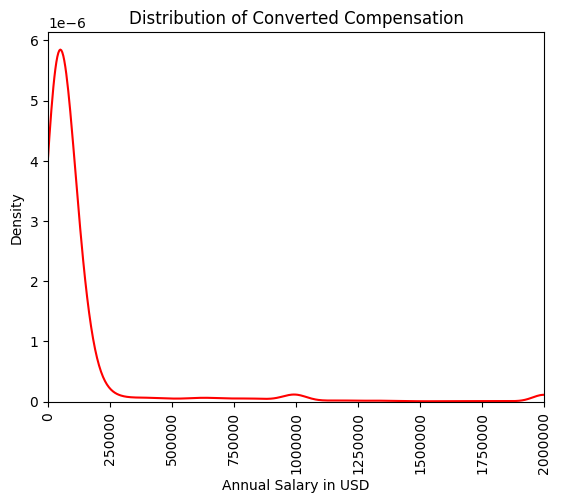

In [7]:
df['ConvertedComp'].plot(kind='kde', color='red')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Density')
plt.xlim(0, df['ConvertedComp'].max())
plt.ylim(0,)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

Plot the histogram for the column `ConvertedComp`.


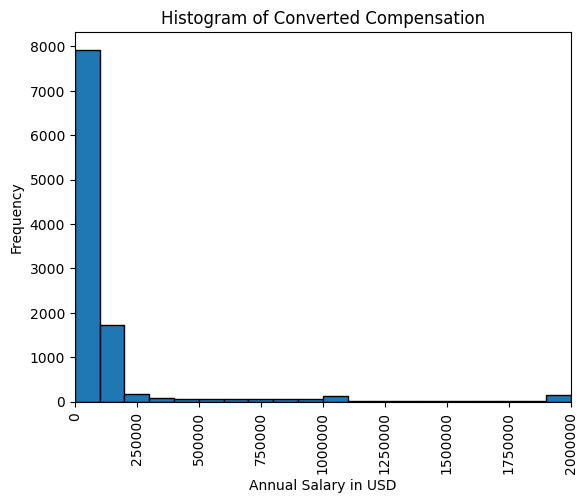

In [8]:
df['ConvertedComp'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.xlim(0, df['ConvertedComp'].max())
plt.ylim(0,)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
print(df['ConvertedComp'].median())


57745.0


How many responders identified themselves only as a **Man**?


In [10]:
print(df['Gender'].value_counts()['Man'])


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
print(df[df['Gender'] == 'Woman']['ConvertedComp'].median())

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
describe = df['Age'].describe()
print("Minimum: ", describe['min'])
print("Q1: ", describe['25%'])
print("Median (Q2): ", describe['50%'])
print("Q3: ", describe['75%'])
print("Maximum: ", describe['max'])

Minimum:  16.0
Q1:  25.0
Median (Q2):  29.0
Q3:  35.0
Maximum:  99.0


Plot a histogram of the column `Age`.


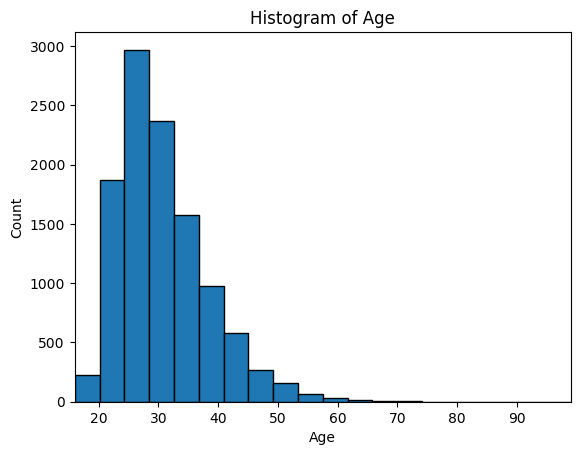

In [13]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(df['Age'].min(), df['Age'].max())
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


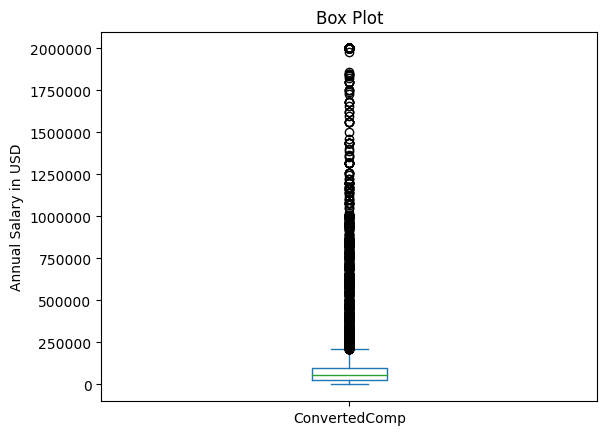

In [14]:
df['ConvertedComp'].plot(kind='box')
plt.title('Box Plot')
plt.ylabel('Annual Salary in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("The lower bound is:", lower_bound)
print("The upper bound is:", upper_bound)

The lower bound is: -82830.0
The upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
outliers = df[df['ConvertedComp'] > upper_bound]
print(len(outliers))

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
df_no_outliers = df[~(df['ConvertedComp'] > upper_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
correlation = df.corr(numeric_only=True)
correlation['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
